## Extending to four Component PR EOS

In [10]:
from matplotlib import pyplot as plt
import pandas as pd
from matplotlib import rcParams
import numpy as np
import matplotlib.cm as cm # matplotlib's color map library
#rcParams['figure.figsize'] = 18.75, 18.75
from scipy import stats
import seaborn as sns
import pr_z_v2 as pr_z
R, mwAir, degF2R = 10.731577089016, 28.97, 459.67

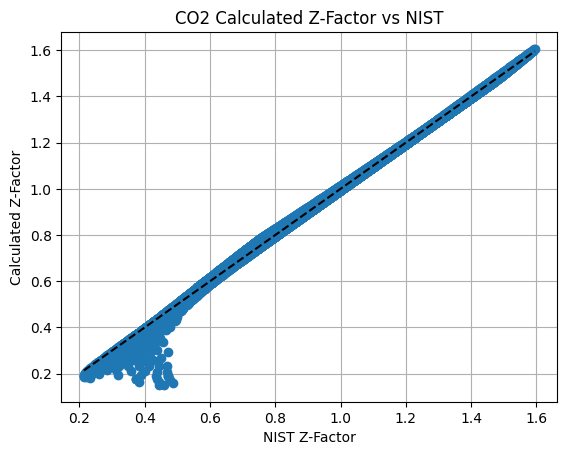

Average Relative error: 0.009277833920090586
99% of data better than error: 0.05056534832864578


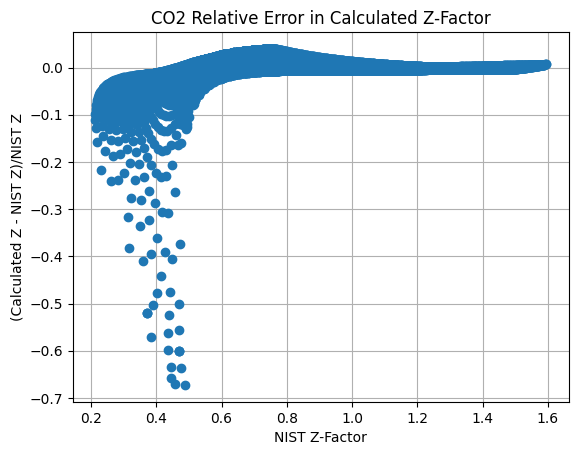

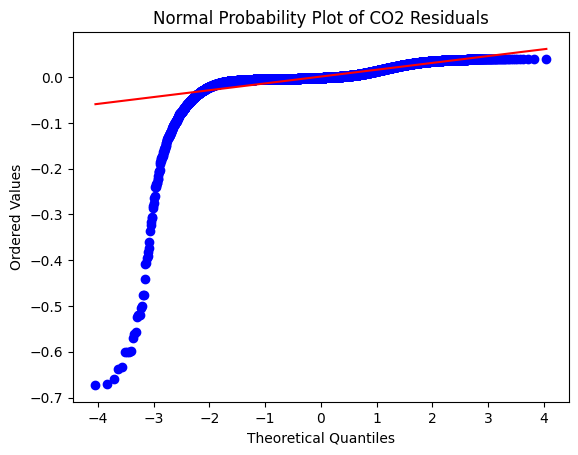

In [3]:
# Compare pure CO2
mwAir = 28.97
mwGas = 44.01
sg = mwGas/mwAir
co2, h2s, n2 = 1.0, 0.0, 0.0
df = pd.read_excel('NIST_Zs.xlsx', sheet_name='CO2')
degfs = np.array(df['Temperature (F)'])
psias = np.array(df['Pressure (psia)'])
Zs = np.array(df['Z'])
densities = psias*mwGas/(Zs*R*(degfs+degF2R))
calc_Zs = []
for i in range(len(degfs)):
    calc_Zs.append(pr_z.peng_robinson_z(degfs[i], psias[i], sg, co2=co2, h2s=h2s, n2=n2))
calc_Zs = np.array(calc_Zs)
calc_densities = psias*mwGas/(calc_Zs*R*(degfs+degF2R))
plt.plot(Zs, calc_Zs, 'o')
plt.plot([min(Zs), max(Zs)], [min(Zs), max(Zs)], '--', c='k')
plt.title('CO2 Calculated Z-Factor vs NIST')
plt.xlabel('NIST Z-Factor')
plt.ylabel('Calculated Z-Factor')
plt.grid()
#plt.savefig('co2.png')
plt.show()
errs = np.abs(calc_Zs - Zs)/Zs
print('Average Relative error:',np.mean(errs))
print('99% of data better than error:', np.percentile(errs, 99))

errs = (calc_Zs - Zs)/Zs
plt.plot(Zs, errs, 'o')
plt.title('CO2 Relative Error in Calculated Z-Factor')
plt.xlabel('NIST Z-Factor')
plt.ylabel('(Calculated Z - NIST Z)/NIST Z')
plt.grid()
#plt.savefig('rel_co2.png')
plt.show()

fig, ax = plt.subplots()
res = stats.probplot(errs, plot=ax)
ax.set_title('Normal Probability Plot of CO2 Residuals')
ax.set_xlabel('Theoretical Quantiles')
ax.set_ylabel('Ordered Values')
plt.show()



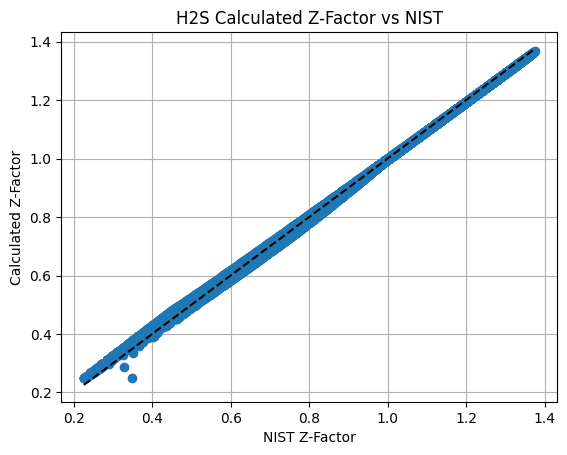

Average Relative error: 0.01583028275935455
99% of data better than error: 0.08024752282915679


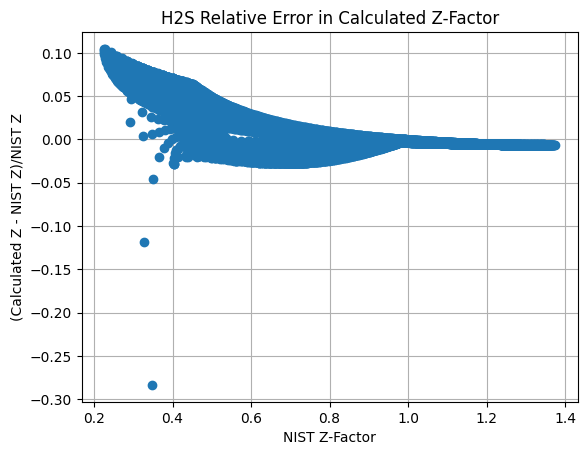

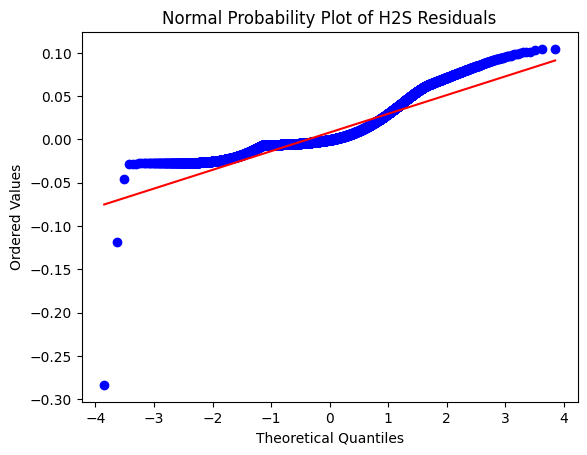

In [4]:
# Compare pure H2S
mwGas = 34.082
sg = mwGas/mwAir
co2, h2s, n2 = 0.0, 1.0, 0.0
df = pd.read_excel('NIST_Zs.xlsx', sheet_name='H2S')
degfs = np.array(df['Temperature (F)'])
psias = np.array(df['Pressure (psia)'])
Zs = np.array(df['Z'])
densities = psias*mwGas/(Zs*R*(degfs+degF2R))
calc_Zs = []
for i in range(len(degfs)):
    calc_Zs.append(pr_z.peng_robinson_z(degfs[i], psias[i], sg, co2=co2, h2s=h2s, n2=n2))
calc_Zs = np.array(calc_Zs)
calc_densities = psias*mwGas/(calc_Zs*R*(degfs+degF2R))
plt.plot(Zs, calc_Zs, 'o')
plt.plot([min(Zs), max(Zs)], [min(Zs), max(Zs)], '--', c='k')
plt.title('H2S Calculated Z-Factor vs NIST')
plt.xlabel('NIST Z-Factor')
plt.xlabel('NIST Z-Factor')
plt.ylabel('Calculated Z-Factor')
plt.grid()
plt.savefig('h2s.png')
plt.show()
errs = np.abs(calc_Zs - Zs)/Zs
print('Average Relative error:',np.mean(errs))
print('99% of data better than error:', np.percentile(errs, 99))

errs = (calc_Zs - Zs)/Zs
plt.plot(Zs, errs, 'o')
plt.title('H2S Relative Error in Calculated Z-Factor')
plt.xlabel('NIST Z-Factor')
plt.ylabel('(Calculated Z - NIST Z)/NIST Z')
plt.grid()
#plt.savefig('rel_co2.png')
plt.show()

fig, ax = plt.subplots()
res = stats.probplot(errs, plot=ax)
ax.set_title('Normal Probability Plot of H2S Residuals')
ax.set_xlabel('Theoretical Quantiles')
ax.set_ylabel('Ordered Values')
plt.show()

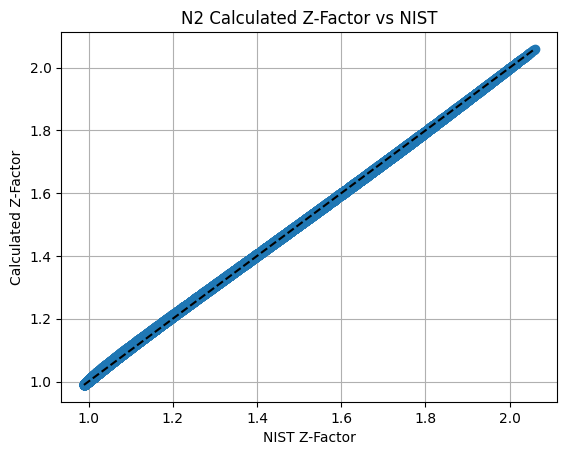

Average Relative error: 0.003741705781978691
99% of data better than error: 0.012086200527583635


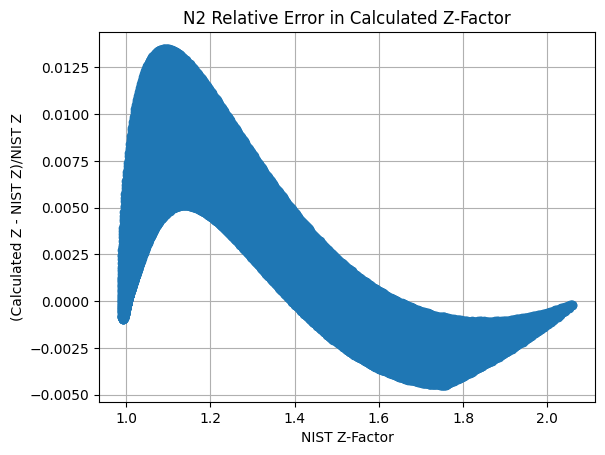

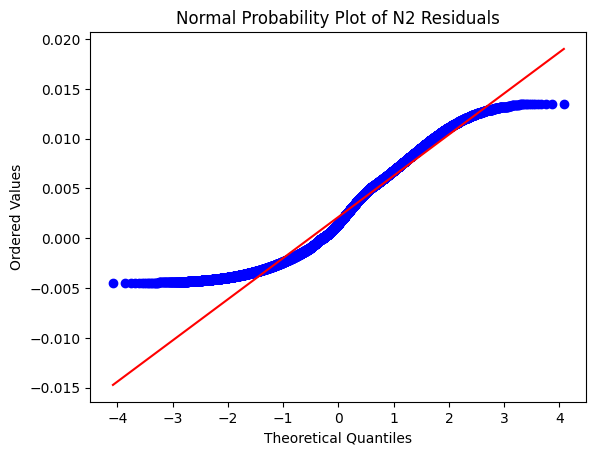

In [5]:
# Compare pure N2
mwGas = 28.014
sg = mwGas/mwAir
co2, h2s, n2 = 0.0, 0.0, 1.0
df = pd.read_excel('NIST_Zs.xlsx', sheet_name='N2')
degfs = np.array(df['Temperature (F)'])
psias = np.array(df['Pressure (psia)'])
Zs = np.array(df['Z'])
densities = psias*mwGas/(Zs*R*(degfs+degF2R))
calc_Zs = []
for i in range(len(degfs)):
    calc_Zs.append(pr_z.peng_robinson_z(degfs[i], psias[i], sg, co2=co2, h2s=h2s, n2=n2))
calc_Zs = np.array(calc_Zs)
calc_densities = psias*mwGas/(calc_Zs*R*(degfs+degF2R))
plt.plot(Zs, calc_Zs, 'o')
plt.plot([min(Zs), max(Zs)], [min(Zs), max(Zs)], '--', c='k')
plt.title('N2 Calculated Z-Factor vs NIST')
plt.xlabel('NIST Z-Factor')
plt.xlabel('NIST Z-Factor')
plt.ylabel('Calculated Z-Factor')
plt.grid()
plt.savefig('n2.png')
plt.show()
errs = np.abs(calc_Zs - Zs)/Zs
print('Average Relative error:',np.mean(errs))
print('99% of data better than error:', np.percentile(errs, 99))

errs = (calc_Zs - Zs)/Zs
plt.plot(Zs, errs, 'o')
plt.title('N2 Relative Error in Calculated Z-Factor')
plt.xlabel('NIST Z-Factor')
plt.ylabel('(Calculated Z - NIST Z)/NIST Z')
plt.grid()
#plt.savefig('rel_co2.png')
plt.show()

fig, ax = plt.subplots()
res = stats.probplot(errs, plot=ax)
ax.set_title('Normal Probability Plot of N2 Residuals')
ax.set_xlabel('Theoretical Quantiles')
ax.set_ylabel('Ordered Values')
plt.show()

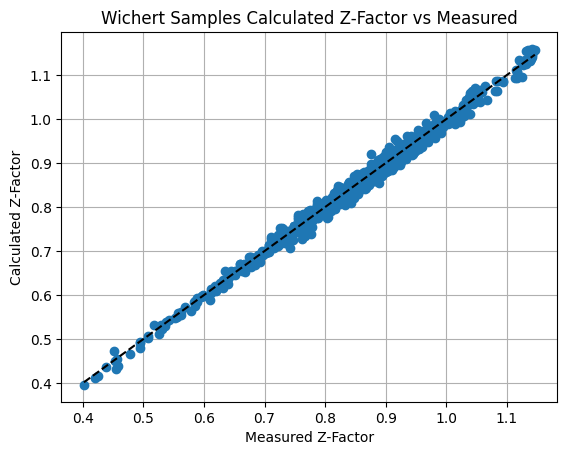

Average Relative error: 0.00907364328040099
99% of data better than error: 0.037753097254791736


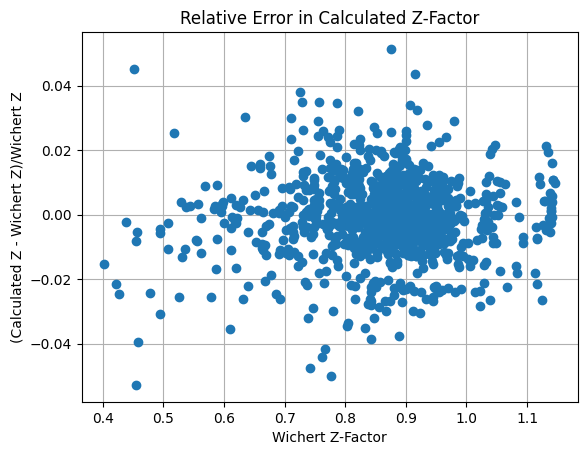

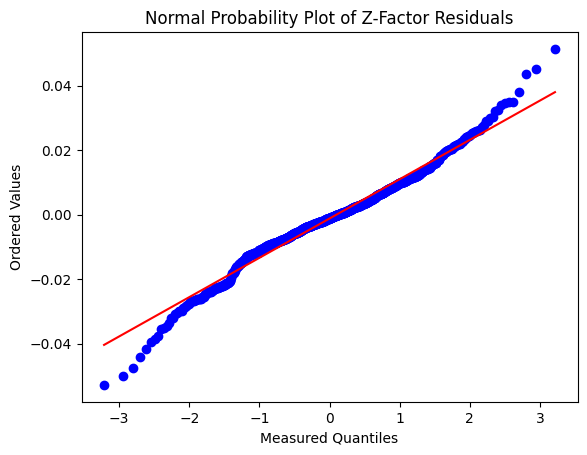

In [8]:
# Compare Wichert data
df = pd.read_excel('Wichert_data_export.xlsx')

degfs = np.array(df['degf'])
psias = np.array(df['psia'])
sgs = np.array(df['sg'])
co2s = np.array(df['co2'])
h2ss = np.array(df['h2s'])
n2s = np.array(df['n2'])
Zs = np.array(df['Z'])

calc_Zs = []
for i in range(len(degfs)):
    calc_Zs.append(pr_z.peng_robinson_z(degfs[i], psias[i], sgs[i], co2=co2s[i], h2s=h2ss[i], n2=n2s[i]))
calc_Zs = np.array(calc_Zs)

plt.plot(Zs, calc_Zs, 'o')
plt.plot([min(Zs), max(Zs)], [min(Zs), max(Zs)], '--', c='k')
plt.title('Wichert Samples Calculated Z-Factor vs Measured')
plt.xlabel('Measured Z-Factor')
plt.ylabel('Calculated Z-Factor')
plt.grid()
plt.savefig('wichert.png')
plt.show()
errs = np.abs(calc_Zs - Zs)/Zs
print('Average Relative error:',np.mean(errs))
print('99% of data better than error:', np.percentile(errs, 99))

errs = (calc_Zs - Zs)/Zs
plt.plot(Zs, errs, 'o')
plt.title('Relative Error in Calculated Z-Factor')
plt.xlabel('Wichert Z-Factor')
plt.ylabel('(Calculated Z - Wichert Z)/Wichert Z')
plt.grid()
plt.savefig('rel_wichert.png')
plt.show()

fig, ax = plt.subplots()
res = stats.probplot(errs, plot=ax)
ax.set_title('Normal Probability Plot of Z-Factor Residuals')
ax.set_xlabel('Measured Quantiles')
ax.set_ylabel('Ordered Values')
plt.savefig('norm_wichert.png')
plt.show()

              degf      psia       co2       h2s        n2     sg_hc  Residual
degf      1.000000  0.234101 -0.091556  0.014794  0.159696  0.398276  0.069712
psia      0.234101  1.000000 -0.087336  0.014026  0.080536  0.341707  0.103767
co2      -0.091556 -0.087336  1.000000 -0.196992 -0.073442 -0.076788 -0.004842
h2s       0.014794  0.014026 -0.196992  1.000000  0.065775 -0.157621 -0.128785
n2        0.159696  0.080536 -0.073442  0.065775  1.000000  0.333616 -0.007479
sg_hc     0.398276  0.341707 -0.076788 -0.157621  0.333616  1.000000  0.041060
Residual  0.069712  0.103767 -0.004842 -0.128785 -0.007479  0.041060  1.000000


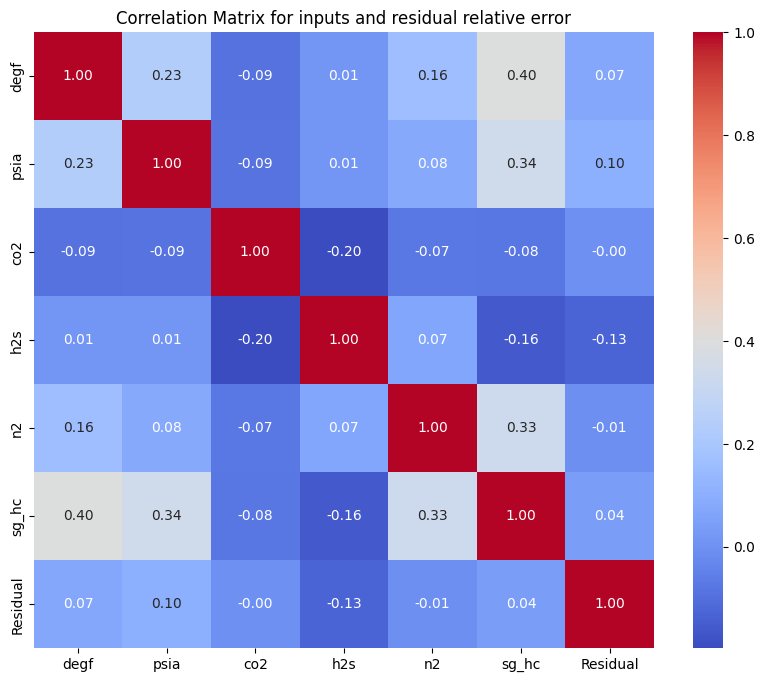

In [9]:
errs = (calc_Zs - Zs)/Zs
if 'Sample' in list(df):
    df.drop(columns = ['Sample'], inplace=True)
try:
    df.drop(columns = ['Z'], inplace=True)
    df['sg_hc'] = (df['sg'] - (df['co2'] * 44.01 + df['h2s'] * 34.082 + df['n2'] * 28.014) / 28.97) / (1 - df['co2'] - df['h2s'] - df['n2'])
    df.drop(columns = ['sg'], inplace=True)
except:
    pass
df['Residual'] = errs
correlation_matrix = df.corr()
print(correlation_matrix)


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix for inputs and residual relative error')
plt.savefig('corel_wichert.png')
plt.show()